# Regresión lineal multivariable

## Importando datos

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creando modelo con sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np 

C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


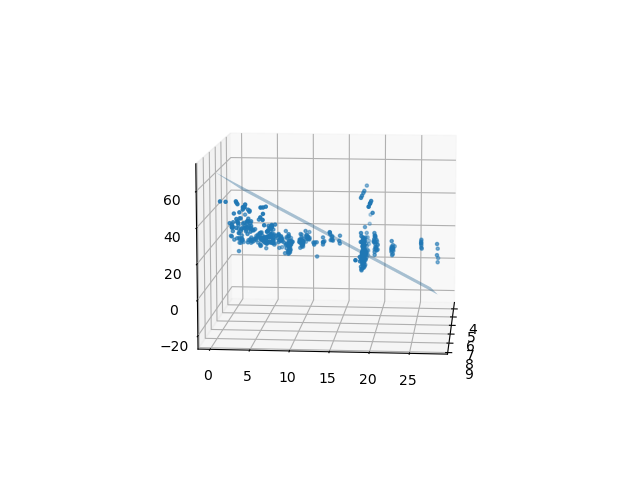

In [25]:
%matplotlib widget
x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

X1, X2 = np.meshgrid(x1_range,x2_range) #Grilla de x con RM e INDUS

plano = pd.DataFrame({'RM':X1.ravel(), 'INDUS':X2.ravel()}) #Redimensión a 1D
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
ax.plot_surface(X1,X2,pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], marker='.')
ax.view_init(elev=10, azim=5)
plt.show()

## Generando predicción con el modelo

In [24]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(-1, 1))
price_std = slr.predict(num_rooms_std)
print('El precio en miles es de %.3f'%
      sc_y.inverse_transform(price_std))

ValueError: X has 1 features, but StandardScaler is expecting 2 features as input.